In [1]:
from skimage import io
from pylab import *
import cv2

1. Blending Two Images

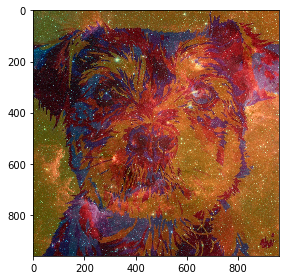

In [2]:
# Define image path
# Read image
img1 = cv2.imread("dog.jpg") 
img2 = cv2.imread("space.jpg")
# Convert BGR to RGB
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)


# Produce new image
alpha = 0.30 
beta = 0.70
gamma = 0
final_image = cv2.addWeighted(img1, alpha, img2, beta, gamma) 


# Display image
io.imshow(final_image)

2. Changing Contrast and Brightness

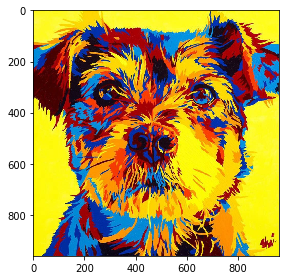

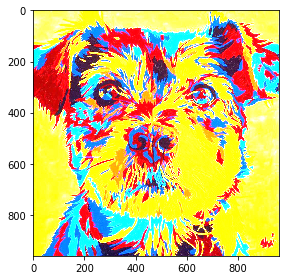

In [3]:
import numpy as np

# Read image
image = cv2.imread("dog.jpg")
# Convert BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# Produce new images
new_image = np.zeros(image.shape, image.dtype)
contrast = 3.0
brightness = 2
minimum = image.min()
maximum = image.max()
for i in range(image.shape[0]):    
    for j in range(image.shape[1]):        
        for k in range(image.shape[2]):             
            new_image[i, j, k] = np.clip(
                contrast*image[i, j, k] + brightness,
                minimum, 
                maximum
            )

            
# Display images
figure(0) 
io.imshow(image) 
figure(1) 
io.imshow(new_image)

3. Adding Text to Images

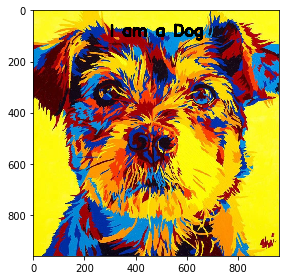

In [4]:
# Read image
image = cv2.imread("dog.jpg")
# Convert BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# Adding text
coordinates = (300, 100)
font = cv2.FONT_HERSHEY_SIMPLEX
size = 2
color = (0, 0, 0)
thickness = 10
line_type = cv2.LINE_AA 
cv2.putText(image, "I am a Dog", coordinates, font, size, color, thickness, line_type)


# Display image
io.imshow(image)

4. Smoothing Images - Median, Gaussian and Bilateral Filter

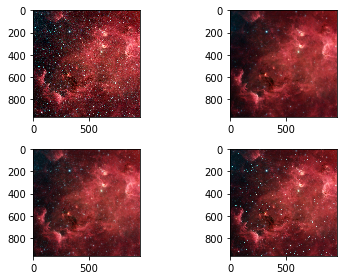

In [5]:
# Read image
image = cv2.imread("space.jpg")
# Convert BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# Smoothing
image_Median = cv2.medianBlur(image, 9) 
image_Gaussian = cv2.GaussianBlur(image, (9, 9), 10) 
image_Bilateral = cv2.bilateralFilter(image, 9, 100, 75)


# Display images
fig, grid = subplots(2, 2)
grid[0,0].imshow(image)
grid[0,1].imshow(image_Median)
grid[1,0].imshow(image_Gaussian)
grid[1,1].imshow(image_Bilateral)
fig.tight_layout()

In [6]:
# # Average filter

# image_Average = cv2.blur(image, (5, 5)) 
# io.imshow(image_Average)

# # OR

# # image_Average = cv2.boxFilter(image, 0, (5, 5))
# # io.imshow(image_Average)

# # OR

# # kernel = np.ones((5, 5), np.float32)/25
# # image_Average = cv2.filter2D(image, -1, kernel)
# # io.imshow(image_Average)

In [7]:
# # Weighted average filter (lesser and lesser importance moving away from center)
# # Special case: Gaussian filter (each pixel is from bivariate normal distribution)

# kernel = np.array([
#     [ 1,  4,  6,  4, 1],
#     [ 4, 16, 24, 16, 4],
#     [ 6, 24, 36, 24, 6],
#     [ 4, 16, 24, 16, 4],
#     [ 1,  4,  6,  4, 1]
# ])/256
# image_WtAverage = cv2.filter2D(image, -1, kernel)
# io.imshow(image_WtAverage)


# # Gaussian kernels may also be produced by
# # Method 1
# from scipy.stats import multivariate_normal
# import numpy as np
# x = np.linspace(0, 5, 5, endpoint = False)
# y = multivariate_normal.pdf(x, mean = 2, cov = 0.5)
# y = y.reshape(1, 5)
# kernel = np.dot(y.T, y)
# # Method 2
# kernel_1d = cv2.getGaussianKernel(5, 1)
# kernel = np.dot(kernel_1d, kernel_1d.T)

In [8]:
# from PIL import Image, ImageFilter 
# from IPython.display import display
    
# # Maximum filter
# image = Image.open("space.jpg") 
# image_Min = image.filter(ImageFilter.MinFilter(size = 5)) 
# display(image_Min)

# # Minimum filter
# image = Image.open("space.jpg") 
# image_Max = image.filter(ImageFilter.MaxFilter(size = 5)) 
# display(image_Max)

5.1. Changing the Shape of Images - Erosion

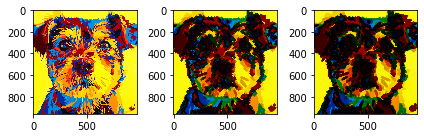

In [9]:
# Read image
image = cv2.imread("dog.jpg")
# Convert BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# Define erosion size 
e1, e2, e3 = 0, 10, 10
# Define erosion type 
t1, t2, t3 = cv2.MORPH_RECT, cv2.MORPH_CROSS, cv2.MORPH_ELLIPSE  
# Define and save the erosion template 
tmp1 = cv2.getStructuringElement(t1, (2*e1 + 1, 2*e1 + 1), (e1, e1)) 
tmp2 = cv2.getStructuringElement(t2, (2*e2 + 1, 2*e2 + 1), (e2, e2)) 
tmp3 = cv2.getStructuringElement(t3, (2*e3 + 1, 2*e3 + 1), (e3, e3))
# Apply the erosion template to the image and save in different variables 
final1 = cv2.erode(image, tmp1) 
final2 = cv2.erode(image, tmp2) 
final3 = cv2.erode(image, tmp3)


# Show images
fig, grid = subplots(1, 3)
grid[0].imshow(final1)
grid[1].imshow(final2)
grid[2].imshow(final3)
fig.tight_layout()

5.2. Changing the Shape of Images - Dilation

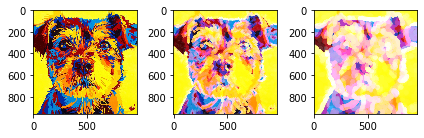

In [10]:
# Read image
image = cv2.imread("dog.jpg") 
# Convert BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# Define dilation size
d1, d2, d3 = 0, 10, 20
# Define dilation type 
t1, t2, t3 = cv2.MORPH_RECT, cv2.MORPH_CROSS, cv2.MORPH_ELLIPSE
# Store the dilation templates 
tmp1 = cv2.getStructuringElement(t1, (2*d1 + 1, 2*d1 + 1), (d1, d1)) 
tmp2 = cv2.getStructuringElement(t2, (2*d2 + 1, 2*d2 + 1), (d2, d2)) 
tmp3 = cv2.getStructuringElement(t3, (2*d3 + 1, 2*d3 + 1), (d3, d3))
# Apply dilation to the images 
final1 = cv2.dilate(image, tmp1) 
final2 = cv2.dilate(image, tmp2) 
final3 = cv2.dilate(image, tmp3)


# Show images 
fig, grid = subplots(1, 3)
grid[0].imshow(final1)
grid[1].imshow(final2)
grid[2].imshow(final3)
fig.tight_layout()

6. Effecting Image Thresholding

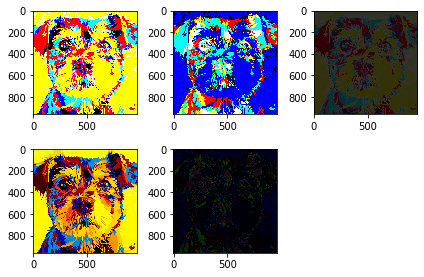

In [11]:
# Read image
image = cv2.imread("dog.jpg") 
# Convert BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# Thresholdng
_, img1 = cv2.threshold(image, 50, 255, 0 ) 
_, img2 = cv2.threshold(image, 50, 255, 1 ) 
_, img3 = cv2.threshold(image, 50, 255, 2 ) 
_, img4 = cv2.threshold(image, 50, 255, 3 ) 
_, img5 = cv2.threshold(image, 50, 255, 4 )  


# Show images
fig, grid = subplots(2, 3)
grid[0, 0].imshow(img1)
grid[0, 1].imshow(img2)
grid[0, 2].imshow(img3)
grid[1, 0].imshow(img4)
grid[1, 1].imshow(img5)
axis("off")
fig.tight_layout()

7. Calculating Gradients

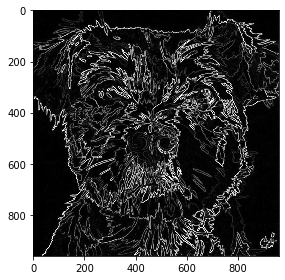

In [21]:
# Read image
image = cv2.imread("dog.jpg") 

# Apply gaussian blur 
image = cv2.GaussianBlur(image, (3, 3), 0)
# Convert image to grayscale 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Horizontal Sobel Derivation 
grad_x = cv2.Sobel(gray, cv2.CV_16S, 1, 0, ksize = 3, scale = 1, delta = 0) #, borderType = cv2.BORDER_DEFAULT) 
# Vertical Sobel Derivation 
grad_y = cv2.Sobel(gray, cv2.CV_16S, 0, 1, ksize = 3, scale = 1, delta = 0) #, borderType = cv2.BORDER_DEFAULT) 
# Convert to absolute scale
abs_grad_x = cv2.convertScaleAbs(grad_x) 
abs_grad_y = cv2.convertScaleAbs(grad_y) 
# Take combination of x and y
grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0) 


# Show image 
io.imshow(grad)

8. Histogram Equilization (Contrast improvement)

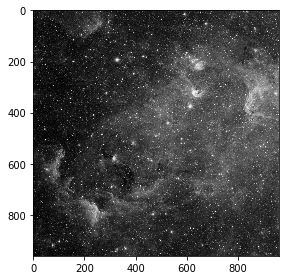

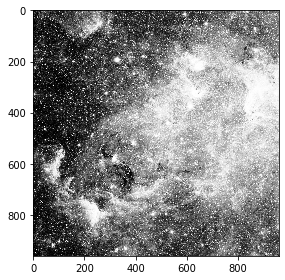

In [13]:
# Read image
image = cv2.imread("space.jpg", 0) # Laod as gray scale 


# Equilization
image_eqlzd = cv2.equalizeHist(image) 


# Show images
figure(0) 
io.imshow(image) 
figure(1) 
io.imshow(image_eqlzd) 

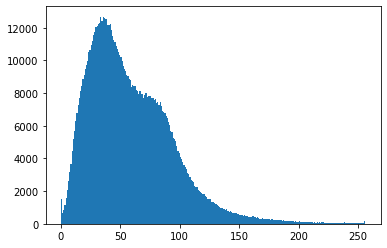

In [19]:
import matplotlib.pyplot as plt 
plt.hist(image.ravel(), bins = 256, range = [0, 256]) 
plt.show()

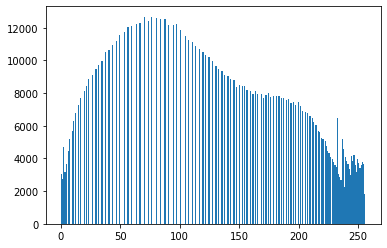

In [20]:
plt.hist(image_eqlzd.ravel(), bins = 256, range = [0, 256]) 
plt.show()